In [1]:
from tardis_em.utils.load_data import load_image
import numpy as np
from tardis_em.utils.normalization import RescaleNormalize, MinMaxNormalize

from tardis_em.cnn.data_processing.stitch import StitchImages
import torch

norm = RescaleNormalize()

In [2]:
org_img, org_px = load_image('../../../../CZI_Gallery/scaling/ycw2012-10-08-4.mrc')
org_img = norm(org_img)

segmented = np.load('../../../../CZI_Gallery/scaling/ycw2012-10-08-4_cnn_raw.npy')
segmented_sigmoid = np.load('../../../../CZI_Gallery/scaling/ycw2012-10-08-4_cnn.npy')


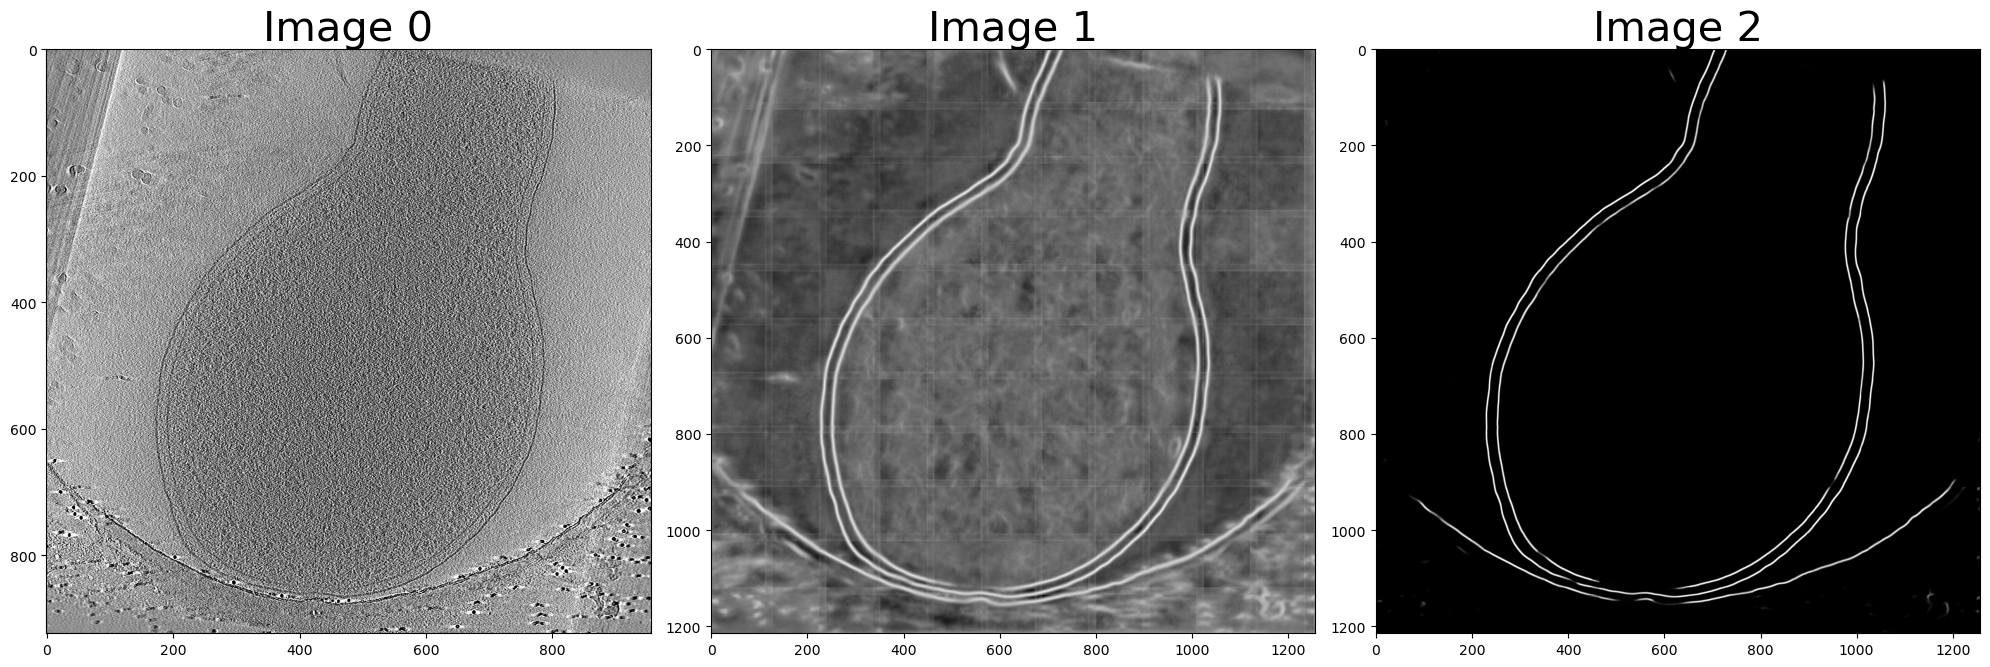

In [3]:
from tardis_em.utils.visualize_pc import show_image_list
from tardis_em.utils.normalization import RescaleNormalize

org_slice = 250
slice_ = int(org_slice * (org_px / 15))

org_slice = org_img[org_slice, :]


show_image_list([org_slice, segmented[slice_, :], segmented_sigmoid[slice_, :]], num_cols=3, grid=False)

# Scaling or Tomogram file

In [4]:
from tardis_em.cnn.data_processing.scaling import linear_scaling, area_scaling, pil_LANCZOS, nn_scaling, fourier_scaling

test_img = org_img[150:350, 600:, :600]

# Upsample to 8A
up_sample = tuple(np.multiply(test_img.shape, org_px/8).astype(np.uint16))
print(f'Up: {up_sample}')

org_up_linear = linear_scaling(test_img, up_sample, dtype=test_img.dtype)
print('done')
org_up_area = area_scaling(test_img, up_sample, dtype=test_img.dtype)
print('done')
org_up_lanczos = pil_LANCZOS(test_img, up_sample, dtype=test_img.dtype)
print('done')
org_up_nn = nn_scaling(test_img, up_sample, dtype=test_img.dtype)
print('done')
org_up_fft = fourier_scaling(test_img, up_sample, dtype=test_img.dtype)
print('done')

org_up_nng = nn_scaling(test_img, up_sample, dtype=test_img.dtype, gauss=True)
print('done')

# Downsample to 25A
down_sample = tuple(np.multiply(test_img.shape, org_px/35).astype(np.uint16))
print(f'Down: {down_sample}')

org_down_linear = linear_scaling(test_img, down_sample, dtype=test_img.dtype)
print('done')
org_down_area = area_scaling(test_img, down_sample, dtype=test_img.dtype)
print('done')
org_down_lanczos = pil_LANCZOS(test_img, down_sample, dtype=test_img.dtype)
print('done')
org_down_nn = nn_scaling(test_img, down_sample, dtype=test_img.dtype)
print('done')
org_down_nng = nn_scaling(test_img, down_sample, dtype=test_img.dtype, gauss=True)
print('done')
org_down_fft = fourier_scaling(test_img, down_sample, dtype=test_img.dtype)
print('done')


Up: (493, 799, 1479)
done
done
done
done
done
done
Down: (112, 182, 338)
done
done
done
done
done
done


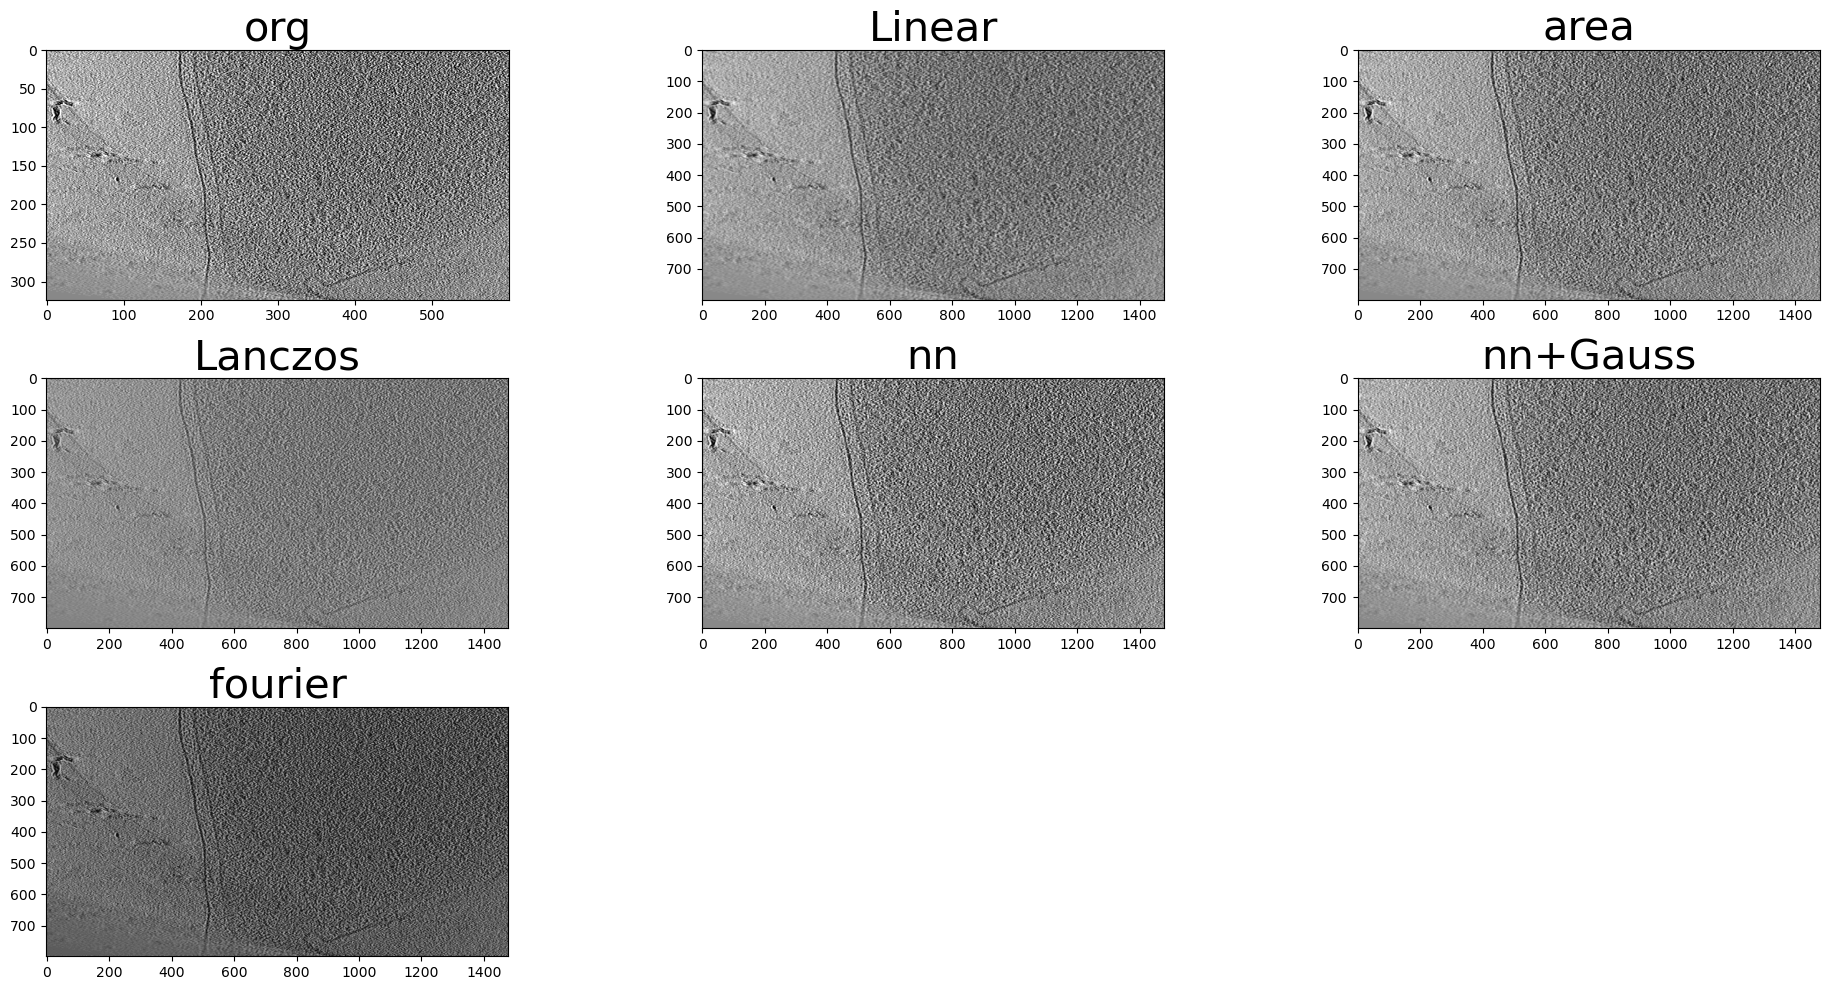

In [5]:
from tardis_em.utils.visualize_pc import show_image_list

slice_ = 50
slice_up = int(slice_ * org_px/8)
slice_down = int(slice_ * org_px/25)

show_image_list([test_img[slice_, :], org_up_linear[slice_up, :], org_up_area[slice_up, :], org_up_lanczos[slice_up, :], org_up_nn[slice_up, :], org_up_nng[slice_up, :], org_up_fft[slice_up, :]], 
                num_cols=3, list_titles=['org', 'Linear', 'area', "Lanczos", 'nn', 'nn+Gauss', 'fourier'], grid=False)

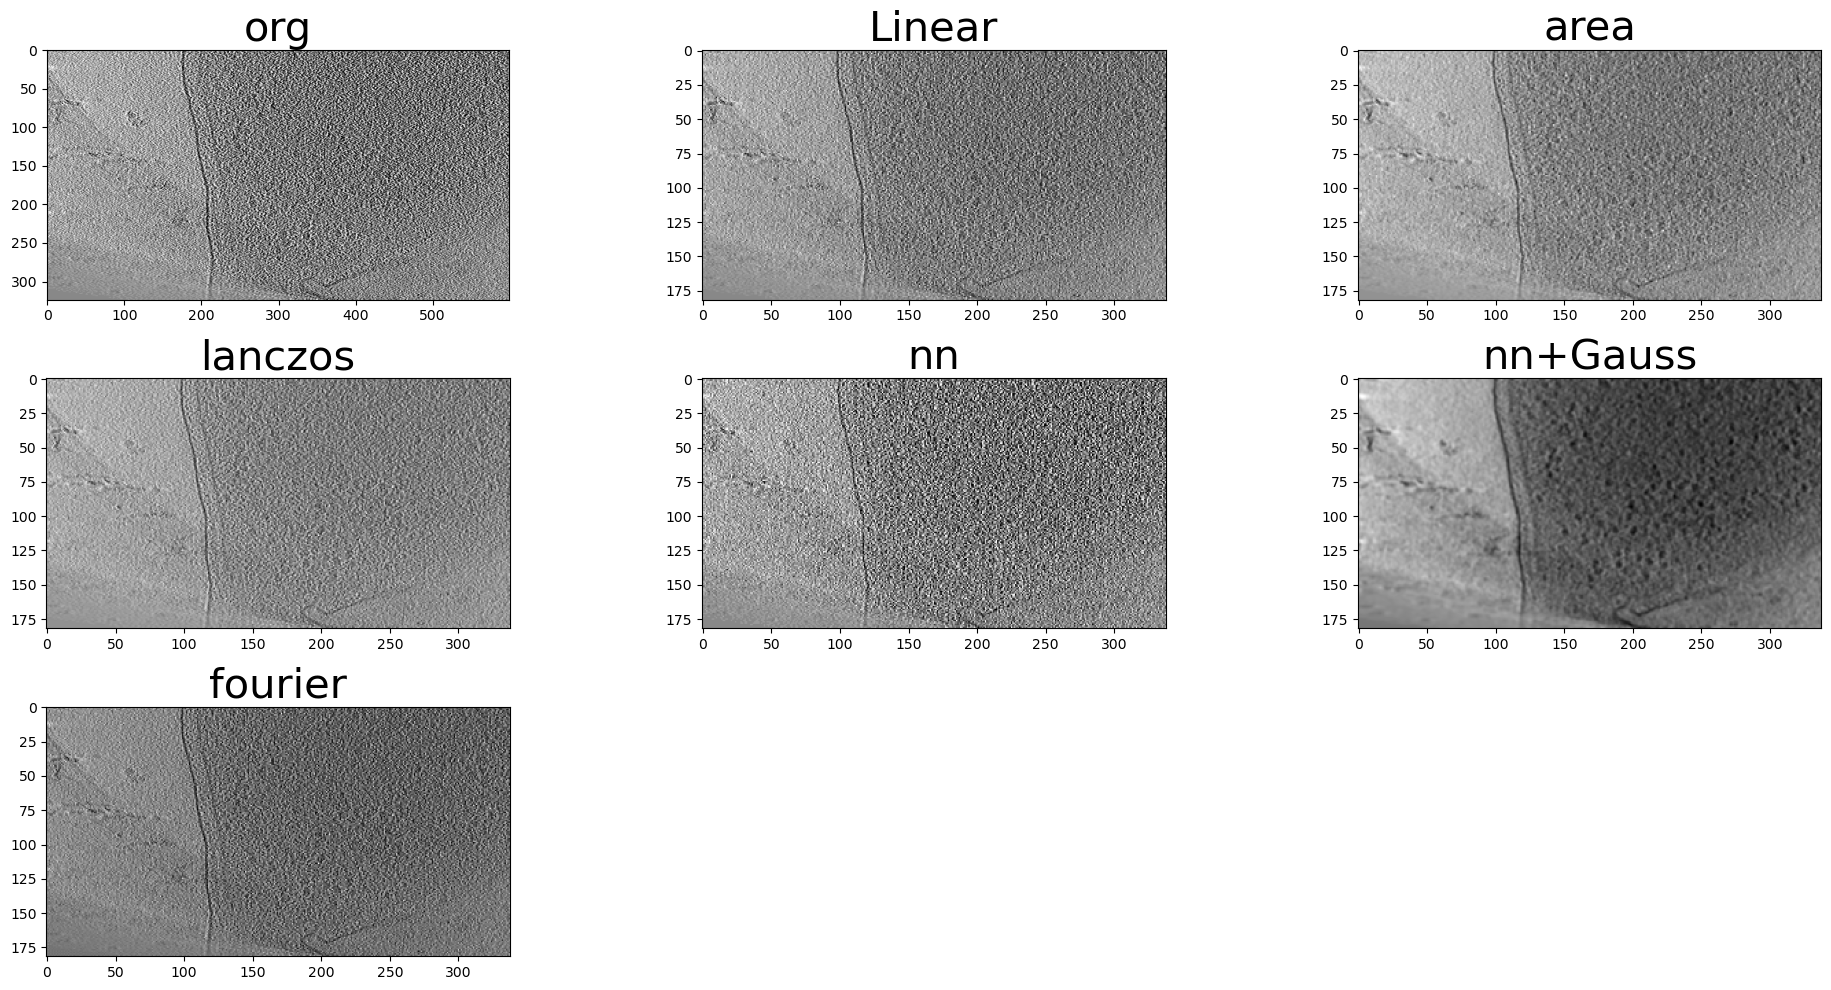

In [6]:
from tardis_em.utils.visualize_pc import show_image_list

slice_ = 45
slice_down = int(round(slice_ * org_px/25, 0))-10

show_image_list([test_img[slice_, :], org_down_linear[slice_down, :], org_down_area[slice_down, :], org_down_lanczos[slice_down, :], org_down_nn[slice_down, :], org_down_nng[slice_down, :], org_down_fft[slice_down, :]], 
                num_cols=3, list_titles=['org', 'Linear', 'area', 'lanczos', 'nn', 'nn+Gauss','fourier'], grid=False)

# Scale for mask files

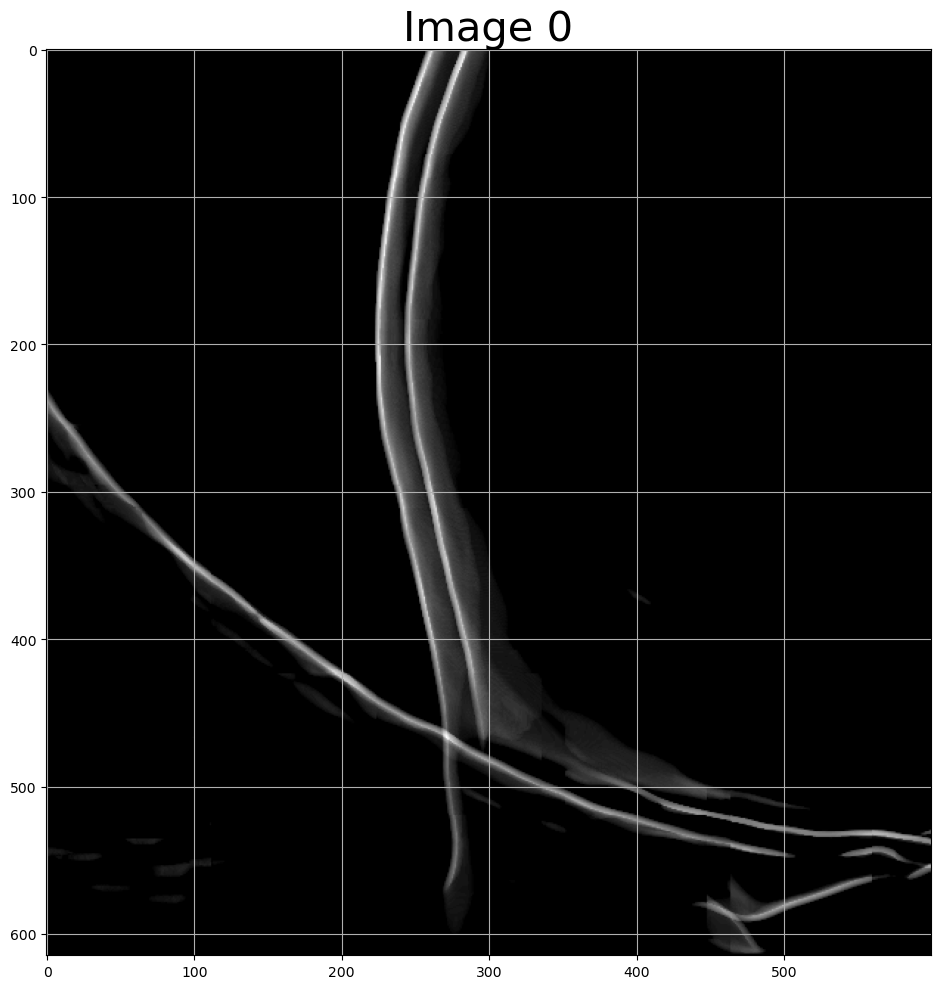

In [7]:
mask = segmented_sigmoid[150:350, 600:, :600]
mask = np.where(mask >= 0.25, 1, 0).astype(np.uint8)
show_image_list([np.sum(mask, 0)])

In [8]:
from tardis_em.cnn.data_processing.scaling import linear_scaling, area_scaling, pil_LANCZOS, nn_scaling, fourier_scaling

# Upsample to 8A
up_sample = tuple(np.multiply(mask.shape, org_px/8).astype(np.uint16))
print(f'Up: {up_sample}')

mask_up_linear = linear_scaling(mask, up_sample, dtype=mask.dtype)
print('done')
mask_up_area = area_scaling(mask, up_sample, dtype=mask.dtype)
print('done')
mask_up_lanczos = pil_LANCZOS(mask, up_sample, dtype=mask.dtype)
print('done')
mask_up_nn = nn_scaling(mask, up_sample, dtype=mask.dtype)
print('done')
mask_up_fft = fourier_scaling(mask, up_sample, dtype=mask.dtype)
print('done')

mask_up_nng = nn_scaling(mask, up_sample, dtype=mask.dtype, gauss=True)
print('done')

# Downsample to 25A
down_sample = tuple(np.multiply(mask.shape, org_px/35).astype(np.uint16))
print(f'Down: {down_sample}')

mask_down_linear = linear_scaling(mask, down_sample, dtype=mask.dtype)
print('done')
mask_down_area = area_scaling(mask, down_sample, dtype=mask.dtype)
print('done')
mask_down_lanczos = pil_LANCZOS(mask, down_sample, dtype=mask.dtype)
print('done')
mask_down_nn = nn_scaling(mask, down_sample, dtype=mask.dtype)
print('done')
mask_down_nng = nn_scaling(mask, down_sample, dtype=mask.dtype, gauss=True)
print('done')
mask_down_fft = fourier_scaling(mask, down_sample, dtype=mask.dtype)
print('done')


Up: (493, 1516, 1479)
done
done
done
done
done
done
Down: (112, 346, 338)
done
done
done
done
done
done


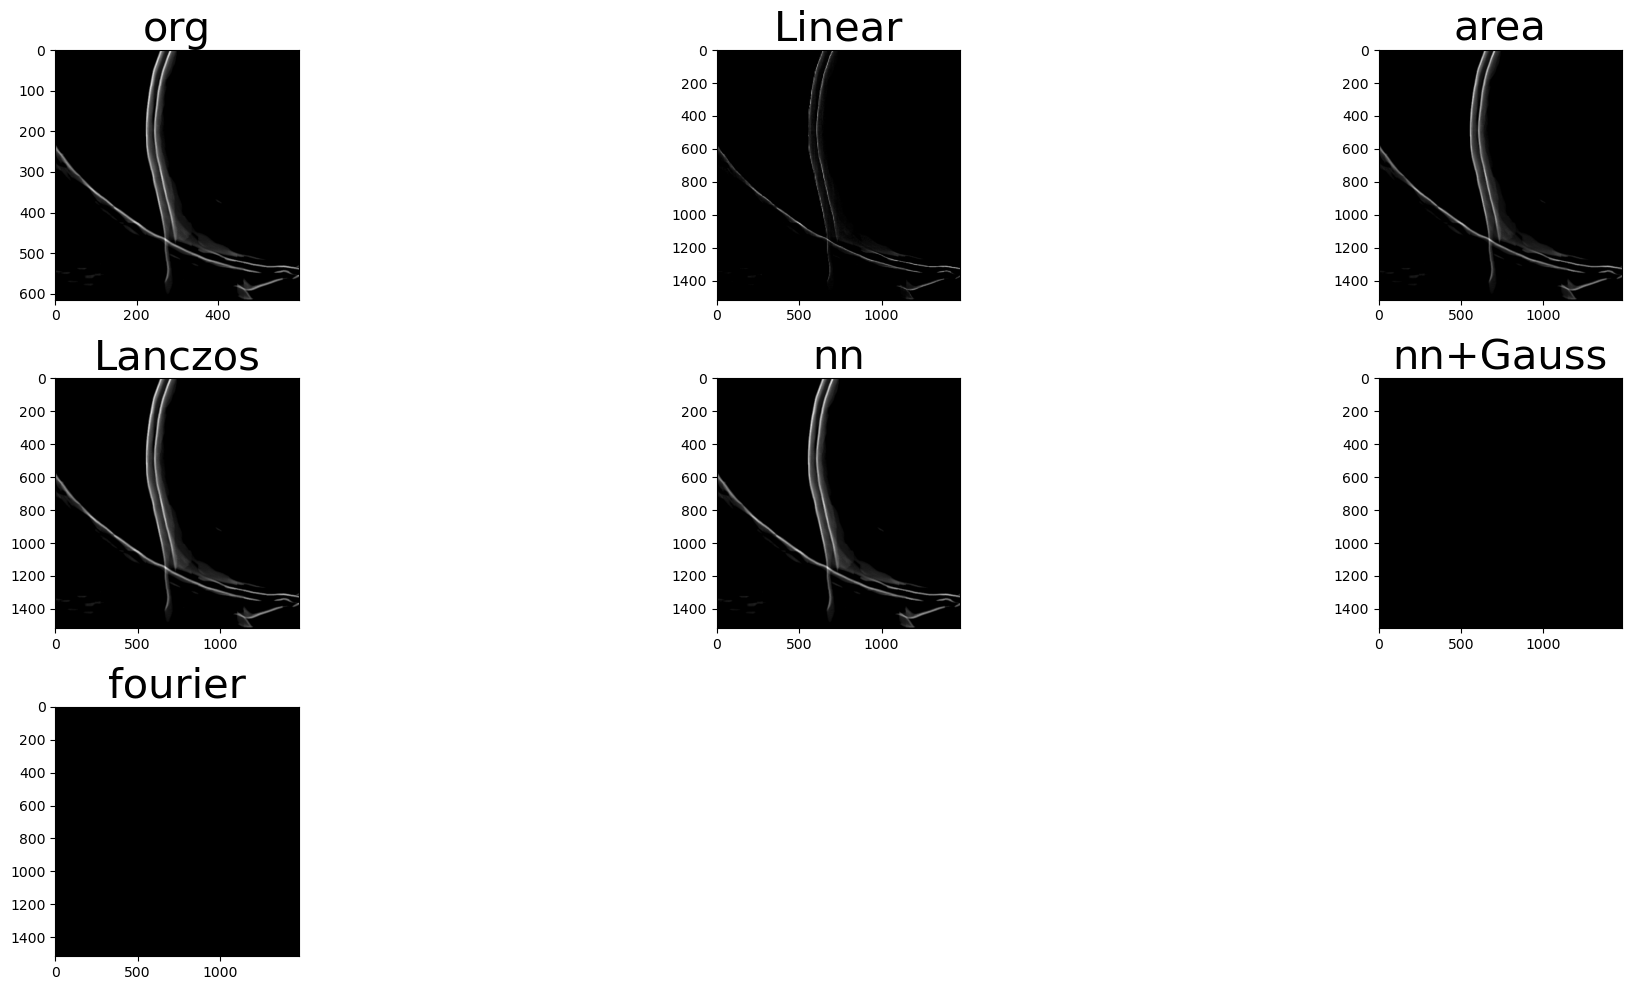

In [9]:
from tardis_em.utils.visualize_pc import show_image_list

show_image_list([np.sum(mask, 0), np.sum(mask_up_linear, 0), np.sum(mask_up_area, 0), np.sum(mask_up_lanczos, 0), np.sum(mask_up_nn, 0), np.sum(mask_up_nng, 0), np.sum(mask_up_fft, 0)], 
                num_cols=3, list_titles=['org', 'Linear', 'area', "Lanczos", 'nn', 'nn+Gauss', 'fourier'], grid=False)

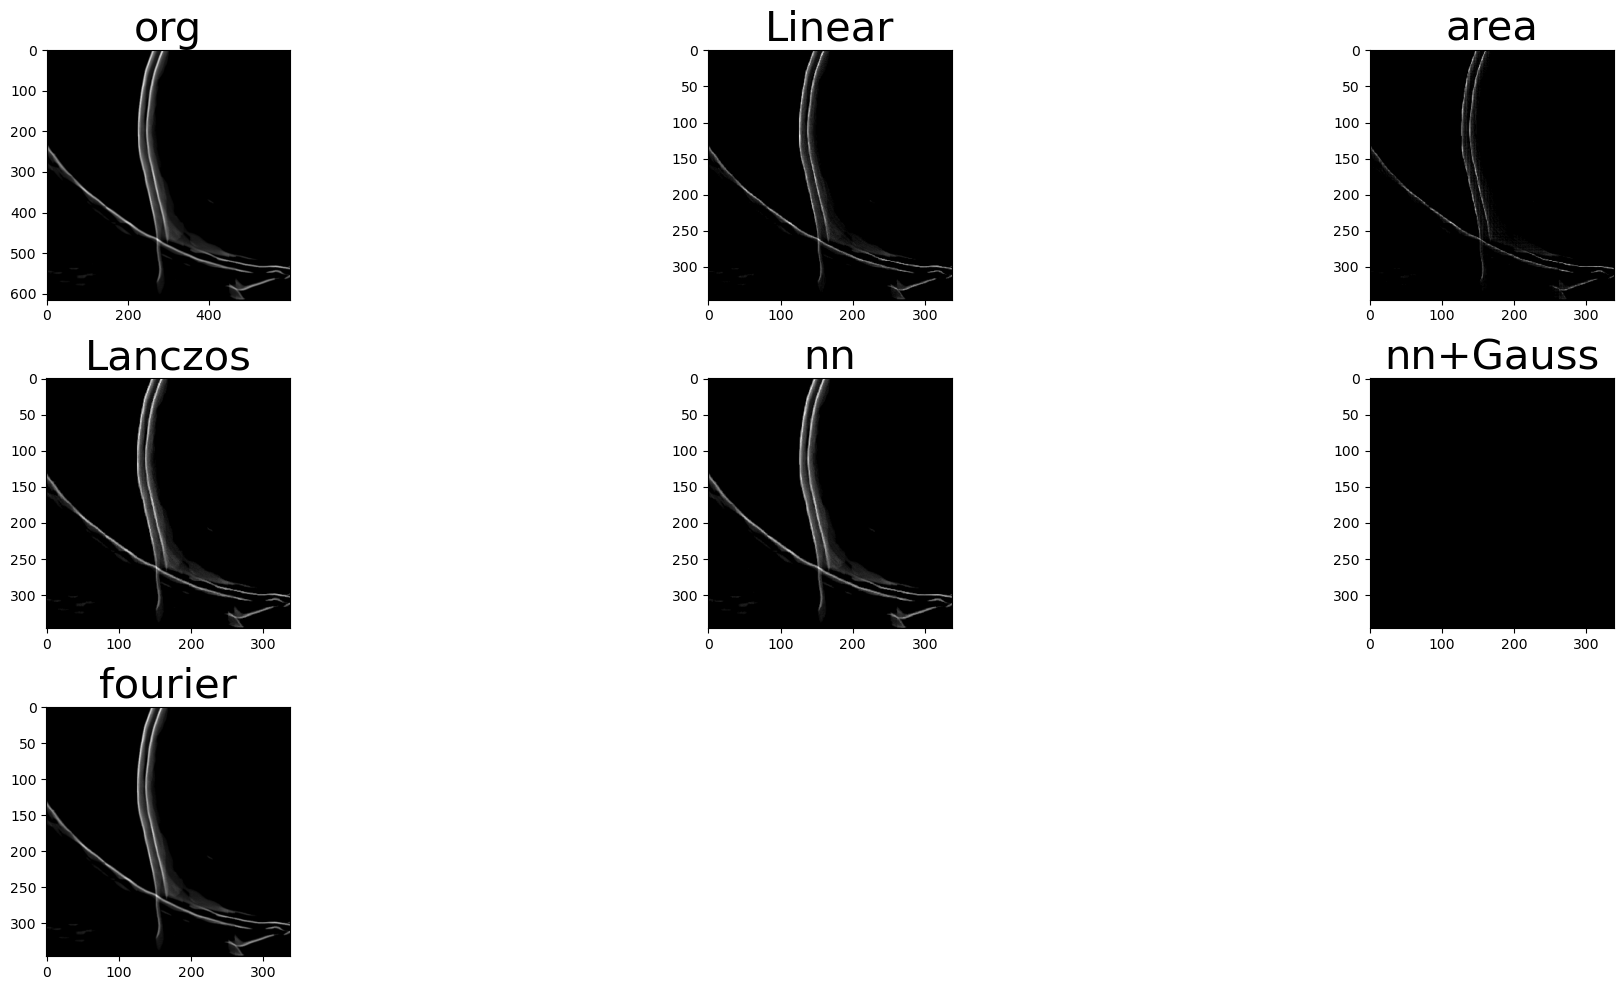

In [10]:
from tardis_em.utils.visualize_pc import show_image_list

show_image_list([np.sum(mask, 0), np.sum(mask_down_linear, 0), np.sum(mask_down_area, 0), np.sum(mask_down_lanczos, 0), np.sum(mask_down_nn, 0), np.sum(mask_down_nng, 0), np.sum(mask_down_fft, 0)], 
                num_cols=3, list_titles=['org', 'Linear', 'area', "Lanczos", 'nn', 'nn+Gauss', 'fourier'], grid=False)